##### M&M SCHOOL'S ADMISSION PREDICTION MODEL 

Introduction:

M&M College faces challenges in efficiently categorizing student applicants due to the high volume of applications and the limited resources available for individualized assessment. These results in time-intensive manual evaluations, potential inconsistencies in admission decisions, and limited capacity for proactive support for applicants needing coaching.
The goal of this project is to develop a supervised (classification) machine learning model that predicts the admission outcome for applicants, categorized as: (0) not admitted, (1) needs coaching, or (2) admitted. This model will help the college streamline the admission process, allocate resources more effectively, and enhance fairness and consistency in applicant evaluation.

The column in the dataset are:
 - S/N: Serial Number
 - Name
 - Admission year
 - Mathematics (100)
 - English Language (100)
 - General Paper (100)
 - Total (300)
 - Weighted Average (100%)
 - Admission Status

Learning Outcomes:
- Exploratory Data Analysis
- preparing the data to train a model
- comparing model performances


Objective:
To develop a supervised machine learning model that accurately predicts the admission outcomes of applicants to M&M College, categorizing them into one of three possible outcomes: (0) not admitted, (1) needs coaching, or (2) admitted.

Due to the limited data point available for the initial training of the model, more data were generated random online from this website, the data were generated to reflect real world stutern student's data. Downloaded dummy data from [https://www.mockaroo.com/] to add to the existing data, so as to make the machine learning model perform very well

Imported Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA GATHERING & EXPLORATION 



DATA CLEANING:

In [6]:
df1 = pd.read_csv(r"C:\Users\USER PC\Downloads\Data Extract.csv")

In [7]:
df1

,S/N,NAME,Admission Year,MATHS (100),ENGLISH STUDIES (100),GENERAL PAPER (100),TOTAL (300),WEIGHTED AVERAGE %,REMARKS
0,1,Benjamin Rachael,2022,82.5,74,74.6,231.1,77.03%,NaN
1,2,Ajibade Feranmi,2022,58.5,70,58.4,186.9,62.30%,NaN
2,3,Ajiboye Monjolaoluwa,2022,40,79,66.6,185.6,61.87%,NaN
3,4,Bamidele Daniel,2022,53,52,63.7,168.7,56.23%,NaN
4,5,Giwa Aminat Adesewa,2022,33,65,54.8,152.8,50.93%,NaN
...,...,...,...,...,...,...,...,...,...
114,115,MOSES Ephraim OGHENEROKEVEWE,2024,-,-,-,-,0.00%,NaN
115,116,ASEKHAMEN WISDOM,2024,-,-,-,-,0.00%,NaN
116,117,LIADI EMMANUELLA,2024,-,-,-,-,0.00%,NaN
117,118,KOLAWOLE DIVINE,2024,-,-,-,-,0.00%,NaN


In [3]:
#fill up the remarks column with the mode
df1.remarks.mode()

0    Admitted
Name: REMARKS, dtype: object

In [4]:
df1.remarks.fillna(df1.remarks.mode()[0])

0      Admitted
1      Admitted
2      Admitted
3      Admitted
4      Admitted
         ...   
114    Admitted
115    Admitted
116    Admitted
117    Admitted
118    Admitted
Name: REMARKS, Length: 119, dtype: object

In [5]:
df1.columns = df1.columns.str.lower().str.strip().str.replace(" ","_")

In [6]:
arg = np.nan
def replace_dash(x):
    if x == "-":
        return x.replace("-", "0")
    else:
        return x

In [7]:
df1["english_studies_(100)"] = df1["english_studies_(100)"].str.strip()

In [8]:
df1["english_studies_(100)"] = df1["english_studies_(100)"].apply(lambda x: replace_dash(x))

In [9]:
df1

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.5,74,74.6,231.1,77.03%,NaN
1,2,Ajibade Feranmi,2022,58.5,70,58.4,186.9,62.30%,NaN
2,3,Ajiboye Monjolaoluwa,2022,40,79,66.6,185.6,61.87%,NaN
3,4,Bamidele Daniel,2022,53,52,63.7,168.7,56.23%,NaN
4,5,Giwa Aminat Adesewa,2022,33,65,54.8,152.8,50.93%,NaN
...,...,...,...,...,...,...,...,...,...
114,115,MOSES Ephraim OGHENEROKEVEWE,2024,-,0,-,-,0.00%,NaN
115,116,ASEKHAMEN WISDOM,2024,-,0,-,-,0.00%,NaN
116,117,LIADI EMMANUELLA,2024,-,0,-,-,0.00%,NaN
117,118,KOLAWOLE DIVINE,2024,-,0,-,-,0.00%,NaN


In [10]:
# first steps

In [11]:
df1["maths_(100)"] = df1["maths_(100)"].str.strip()

In [12]:
df1["maths_(100)"] = df1["maths_(100)"].apply(lambda x: replace_dash(x))

In [13]:
df1["general_paper_(100)"] = df1["general_paper_(100)"].str.strip()

In [14]:
df1["general_paper_(100)"] = df1["general_paper_(100)"].apply(lambda x: replace_dash(x))

In [15]:
df1["total_(300)"] = df1["total_(300)"].str.strip()

In [16]:
df1["total_(300)"] = df1["total_(300)"].apply(lambda x: replace_dash(x))

In [17]:
df1["english_studies_(100)"] = df1["english_studies_(100)"].astype("int", errors="ignore")

In [18]:
print(df1.dtypes)

s/n                       int64
name                     object
admission_year            int64
maths_(100)              object
english_studies_(100)    object
general_paper_(100)      object
total_(300)              object
weighted_average_%       object
remarks                  object
dtype: object


In [19]:
#change the column types float then
#To fill up the columns with the mean values of the columns 

In [20]:
df1["english_studies_(100)"] = df1["english_studies_(100)"].astype(float) #change the data type to float

In [21]:
df1["english_studies_(100)"].mean()

43.47478991596638

In [22]:
mean = round(df1["english_studies_(100)"].mean(), 2)

In [23]:
mean

43.47

In [24]:
#this function replaces 0.0 with the mean value of the english studies column
def mean_replace(x, mean):
    if x == 0.0:  # Check if the value is exactly 0.0
        return mean  # Replace with the mean value
    else:
        return x 

In [25]:
df1["english_studies_(100)"] = df1["english_studies_(100)"].apply(lambda x: mean_replace(x, mean))

In [26]:
df1["english_studies_(100)"] #english column solved

0      74.00
1      70.00
2      79.00
3      52.00
4      65.00
       ...  
114    43.47
115    43.47
116    43.47
117    43.47
118    43.47
Name: english_studies_(100), Length: 119, dtype: float64

In [27]:
df1["maths_(100)"] = df1["maths_(100)"].astype("float")

In [28]:
df1["maths_(100)"].mean()

31.852941176470587

In [29]:
mean1 = round(df1["maths_(100)"].mean(), 2)

In [30]:
mean1

31.85

In [31]:
#this function replaces 0.0 with the mean value of the maths column
def mean1_replace(x, mean1):
    if x == 0.0:  # Check if the value is exactly 0.0
        return mean1  # Replace with the mean value
    else:
        return x 

In [32]:
df1["maths_(100)"] = df1["maths_(100)"].apply(lambda x: mean1_replace(x, mean1))

In [33]:
df1["maths_(100)"]

0      82.50
1      58.50
2      40.00
3      53.00
4      33.00
       ...  
114    31.85
115    31.85
116    31.85
117    31.85
118    31.85
Name: maths_(100), Length: 119, dtype: float64

In [34]:
df1["general_paper_(100)"] = df1["general_paper_(100)"].astype("float")

In [35]:
df1["general_paper_(100)"].mean()

36.26610169491525

In [36]:
mean2 = round(df1["general_paper_(100)"].mean(), 2)

In [37]:
mean2

36.27

In [38]:
#this function replaces 0.0 with the mean value of the general paper column

def mean2_replace(x, mean2):
    if x == 0.0:  # Check if the value is exactly 0.0
        return mean2  # Replace with the mean value
    else:
        return x 

In [39]:
df1["general_paper_(100)"] = df1["general_paper_(100)"].apply(lambda x: mean2_replace(x, mean2))

In [40]:
df1["general_paper_(100)"]

0      74.60
1      58.40
2      66.60
3      63.70
4      54.80
       ...  
114    36.27
115    36.27
116    36.27
117    36.27
118    36.27
Name: general_paper_(100), Length: 119, dtype: float64

In [41]:
df1["total_(300)"] = df1["maths_(100)"] + df1["english_studies_(100)"] + df1["general_paper_(100)"]

In [42]:
df1["total_(300)"]

0      231.10
1      186.90
2      185.60
3      168.70
4      152.80
        ...  
114    111.59
115    111.59
116    111.59
117    111.59
118    111.59
Name: total_(300), Length: 119, dtype: float64

In [43]:
df1["total_(300)"].isnull().sum()

1

In [44]:
df1

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.50,74.00,74.60,231.10,77.03%,NaN
1,2,Ajibade Feranmi,2022,58.50,70.00,58.40,186.90,62.30%,NaN
2,3,Ajiboye Monjolaoluwa,2022,40.00,79.00,66.60,185.60,61.87%,NaN
3,4,Bamidele Daniel,2022,53.00,52.00,63.70,168.70,56.23%,NaN
4,5,Giwa Aminat Adesewa,2022,33.00,65.00,54.80,152.80,50.93%,NaN
...,...,...,...,...,...,...,...,...,...
114,115,MOSES Ephraim OGHENEROKEVEWE,2024,31.85,43.47,36.27,111.59,0.00%,NaN
115,116,ASEKHAMEN WISDOM,2024,31.85,43.47,36.27,111.59,0.00%,NaN
116,117,LIADI EMMANUELLA,2024,31.85,43.47,36.27,111.59,0.00%,NaN
117,118,KOLAWOLE DIVINE,2024,31.85,43.47,36.27,111.59,0.00%,NaN


In [45]:
missing_values = df1['remarks'].isna().sum()
print(f'Total missing values in remarks: {missing_values}')

Total missing values in remarks: 71


In [46]:
# Define the four different values you want to use for replacement in the remarks column
replacement_values = ["Admitted", "Not Admitted", "Advised for intensive class"]

# Replace the missing values with a random choice from the replacement values
df1['remarks'] = df1['remarks'].apply(lambda x: np.random.choice(replacement_values) if pd.isna(x) else x)

In [47]:
df1.remarks

0      Intensive coaching recommended to qualify for ...
1      Intensive coaching recommended to qualify for ...
2                                               Admitted
3                                           Not Admitted
4                                           Not Admitted
                             ...                        
114    Intensive coaching recommended to qualify for ...
115    Intensive coaching recommended to qualify for ...
116    Intensive coaching recommended to qualify for ...
117    Intensive coaching recommended to qualify for ...
118                                             Admitted
Name: remarks, Length: 119, dtype: object

In [48]:
df1

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.50,74.00,74.60,231.10,77.03%,Intensive coaching recommended to qualify for ...
1,2,Ajibade Feranmi,2022,58.50,70.00,58.40,186.90,62.30%,Intensive coaching recommended to qualify for ...
2,3,Ajiboye Monjolaoluwa,2022,40.00,79.00,66.60,185.60,61.87%,Admitted
3,4,Bamidele Daniel,2022,53.00,52.00,63.70,168.70,56.23%,Not Admitted
4,5,Giwa Aminat Adesewa,2022,33.00,65.00,54.80,152.80,50.93%,Not Admitted
...,...,...,...,...,...,...,...,...,...
114,115,MOSES Ephraim OGHENEROKEVEWE,2024,31.85,43.47,36.27,111.59,0.00%,Intensive coaching recommended to qualify for ...
115,116,ASEKHAMEN WISDOM,2024,31.85,43.47,36.27,111.59,0.00%,Intensive coaching recommended to qualify for ...
116,117,LIADI EMMANUELLA,2024,31.85,43.47,36.27,111.59,0.00%,Intensive coaching recommended to qualify for ...
117,118,KOLAWOLE DIVINE,2024,31.85,43.47,36.27,111.59,0.00%,Intensive coaching recommended to qualify for ...


In [49]:
df2 = pd.read_csv(r"C:\Users\USER PC\Downloads\MOCK_DATA (2).csv")
df3 = pd.read_csv(r"C:\Users\USER PC\Downloads\MOCK_DATA (3).csv")

In [50]:
df2

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Xylia Chesshyre,2022,78.0,49.0,37.0,164.0,55%,NaN
1,2,Felix McGraw,2012,94.0,86.0,62.0,242.0,81%,NaN
2,3,Kippar Lusher,2018,70.0,74.0,36.0,180.0,60%,NaN
3,4,Leoine Tunuy,2020,92.0,74.0,87.0,253.0,84%,NaN
4,5,Sylvester Izakson,2017,59.0,42.0,76.0,177.0,59%,NaN
...,...,...,...,...,...,...,...,...,...
995,996,Tomas Checchetelli,2014,79.0,45.0,87.0,211.0,70%,NaN
996,997,Freddie Mathivat,2018,30.0,49.0,72.0,151.0,50%,NaN
997,998,Susi Beaven,2012,43.0,90.0,84.0,217.0,72%,NaN
998,999,Ruthe Larmett,2016,49.0,95.0,100.0,244.0,81%,NaN


In [51]:
df3

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Chris Pembry,2013,73,99,70,242,81%,NaN
1,2,Alejandra Goricke,2020,42,52,81,175,58%,NaN
2,3,Ganny Stille,2017,88,28,75,191,64%,NaN
3,4,Padget Osmint,2017,88,57,52,197,66%,NaN
4,5,Zonda Zute,2017,71,75,61,207,69%,NaN
...,...,...,...,...,...,...,...,...,...
995,996,Forest Dunbobin,2015,72,92,27,191,64%,NaN
996,997,Wallie Helstrip,2016,62,33,32,127,42%,NaN
997,998,Carolyn Poplee,2019,48,88,32,168,56%,NaN
998,999,Coop Laxton,2012,91,75,100,266,89%,NaN


In [52]:
#merge the dataframes by concatenating them 
concatenated_df = pd.concat([df1, df2, df3], axis=0)

In [53]:
concatenated_df

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.5,74.0,74.6,231.1,77.03%,Intensive coaching recommended to qualify for ...
1,2,Ajibade Feranmi,2022,58.5,70.0,58.4,186.9,62.30%,Intensive coaching recommended to qualify for ...
2,3,Ajiboye Monjolaoluwa,2022,40.0,79.0,66.6,185.6,61.87%,Admitted
3,4,Bamidele Daniel,2022,53.0,52.0,63.7,168.7,56.23%,Not Admitted
4,5,Giwa Aminat Adesewa,2022,33.0,65.0,54.8,152.8,50.93%,Not Admitted
...,...,...,...,...,...,...,...,...,...
995,996,Forest Dunbobin,2015,72.0,92.0,27.0,191.0,64%,NaN
996,997,Wallie Helstrip,2016,62.0,33.0,32.0,127.0,42%,NaN
997,998,Carolyn Poplee,2019,48.0,88.0,32.0,168.0,56%,NaN
998,999,Coop Laxton,2012,91.0,75.0,100.0,266.0,89%,NaN


In [54]:
concatenated_df.to_csv("student_data.csv", index=False)

In [55]:
df = pd.read_csv("student_data.csv")

In [56]:
df

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.5,74.0,74.6,231.1,77.03%,Intensive coaching recommended to qualify for ...
1,2,Ajibade Feranmi,2022,58.5,70.0,58.4,186.9,62.30%,Intensive coaching recommended to qualify for ...
2,3,Ajiboye Monjolaoluwa,2022,40.0,79.0,66.6,185.6,61.87%,Admitted
3,4,Bamidele Daniel,2022,53.0,52.0,63.7,168.7,56.23%,Not Admitted
4,5,Giwa Aminat Adesewa,2022,33.0,65.0,54.8,152.8,50.93%,Not Admitted
...,...,...,...,...,...,...,...,...,...
2114,996,Forest Dunbobin,2015,72.0,92.0,27.0,191.0,64%,NaN
2115,997,Wallie Helstrip,2016,62.0,33.0,32.0,127.0,42%,NaN
2116,998,Carolyn Poplee,2019,48.0,88.0,32.0,168.0,56%,NaN
2117,999,Coop Laxton,2012,91.0,75.0,100.0,266.0,89%,NaN


In [57]:
# Define the four different values you want to use for replacement in the remarks column
replacement_values = ["Admitted", "Not Admitted", "Advised for intensive class"]

# Replace the missing values with a random choice from the replacement values
df['remarks'] = df['remarks'].apply(lambda x: np.random.choice(replacement_values) if pd.isna(x) else x)

In [58]:
df

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.5,74.0,74.6,231.1,77.03%,Intensive coaching recommended to qualify for ...
1,2,Ajibade Feranmi,2022,58.5,70.0,58.4,186.9,62.30%,Intensive coaching recommended to qualify for ...
2,3,Ajiboye Monjolaoluwa,2022,40.0,79.0,66.6,185.6,61.87%,Admitted
3,4,Bamidele Daniel,2022,53.0,52.0,63.7,168.7,56.23%,Not Admitted
4,5,Giwa Aminat Adesewa,2022,33.0,65.0,54.8,152.8,50.93%,Not Admitted
...,...,...,...,...,...,...,...,...,...
2114,996,Forest Dunbobin,2015,72.0,92.0,27.0,191.0,64%,Admitted
2115,997,Wallie Helstrip,2016,62.0,33.0,32.0,127.0,42%,Admitted
2116,998,Carolyn Poplee,2019,48.0,88.0,32.0,168.0,56%,Admitted
2117,999,Coop Laxton,2012,91.0,75.0,100.0,266.0,89%,Admitted


### DEALING WITH MISSING DATA

In [63]:
for pos in missing_positions:
    df.at[pos, 'general_paper_(100)'] = 65

In [59]:
is_missing = pd.isna(df.at[ 87, 'general_paper_(100)'])

In [60]:
if is_missing:
    print(f'Missing value found in row {87} of column "general_paper_(100)".')
else:
    print(f'No missing value in row {87} of column "general_paper_(100)".')

Missing value found in row 87 of column "general_paper_(100)".


In [61]:
missing_positions = df.index[df['general_paper_(100)'].isna()].tolist()

In [62]:
missing_positions

[87]

In [64]:
missing_positions1 = df.index[df['total_(300)'].isna()].tolist()


In [65]:
missing_positions1

[87]

In [66]:
for pos in missing_positions:
    df.at[pos, 'total_(300)'] = 65

In [67]:
df.isnull().sum()

s/n                      0
name                     0
admission_year           0
maths_(100)              0
english_studies_(100)    0
general_paper_(100)      0
total_(300)              0
weighted_average_%       0
remarks                  0
dtype: int64

In [68]:
df['weighted_average_%'] = df['weighted_average_%'].str.replace('%', '')

In [69]:
df["weighted_average_%"] = df["weighted_average_%"].astype(float)

In [70]:
df.dtypes

s/n                        int64
name                      object
admission_year             int64
maths_(100)              float64
english_studies_(100)    float64
general_paper_(100)      float64
total_(300)              float64
weighted_average_%       float64
remarks                   object
dtype: object

In [71]:
df

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks
0,1,Benjamin Rachael,2022,82.5,74.0,74.6,231.1,77.03,Intensive coaching recommended to qualify for ...
1,2,Ajibade Feranmi,2022,58.5,70.0,58.4,186.9,62.30,Intensive coaching recommended to qualify for ...
2,3,Ajiboye Monjolaoluwa,2022,40.0,79.0,66.6,185.6,61.87,Admitted
3,4,Bamidele Daniel,2022,53.0,52.0,63.7,168.7,56.23,Not Admitted
4,5,Giwa Aminat Adesewa,2022,33.0,65.0,54.8,152.8,50.93,Not Admitted
...,...,...,...,...,...,...,...,...,...
2114,996,Forest Dunbobin,2015,72.0,92.0,27.0,191.0,64.00,Admitted
2115,997,Wallie Helstrip,2016,62.0,33.0,32.0,127.0,42.00,Admitted
2116,998,Carolyn Poplee,2019,48.0,88.0,32.0,168.0,56.00,Admitted
2117,999,Coop Laxton,2012,91.0,75.0,100.0,266.0,89.00,Admitted


In [72]:
df.dtypes

s/n                        int64
name                      object
admission_year             int64
maths_(100)              float64
english_studies_(100)    float64
general_paper_(100)      float64
total_(300)              float64
weighted_average_%       float64
remarks                   object
dtype: object

In [73]:
###This function gives the conditions to which a student is admitted 

def categories(math, weighted):
    if pd.isnull(math) or pd.isnull(weighted):
        return "Incomplete data"
    if math >= 50 and weighted >= 50:
        return "Admitted"
    elif math <= 30 and weighted <= 30:
        return "Not Admitted"
    elif 30 > math < 50 and weighted >= 50:
        return "Advised for intensive class"
    elif math >= 50 and 30 < weighted < 50:
        return "Advised for intensive class"
    elif 30 > math < 50 and 40 <= weighted < 50:
        return "Advised for intensive class"
    elif 30 > math < 50 and weighted > 30:
        return "Advised for intensive class"
    else:
        # Default case for any other combination, can assign to "Advised for intensive class"
        return "Advised for intensive class"


In [74]:
df["admission_status"] = df.apply(lambda row: categories(row["maths_(100)"], row["weighted_average_%"]), axis=1)

In [75]:
# df.apply(lambda row: categories(row["maths_(100)"], row["weighted_average_%"]), axis=1)

In [76]:
#categories(df["maths_(100)"], df["weighted_average_%"])

In [77]:
df

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks,admission_status
0,1,Benjamin Rachael,2022,82.5,74.0,74.6,231.1,77.03,Intensive coaching recommended to qualify for ...,Admitted
1,2,Ajibade Feranmi,2022,58.5,70.0,58.4,186.9,62.30,Intensive coaching recommended to qualify for ...,Admitted
2,3,Ajiboye Monjolaoluwa,2022,40.0,79.0,66.6,185.6,61.87,Admitted,Advised for intensive class
3,4,Bamidele Daniel,2022,53.0,52.0,63.7,168.7,56.23,Not Admitted,Admitted
4,5,Giwa Aminat Adesewa,2022,33.0,65.0,54.8,152.8,50.93,Not Admitted,Advised for intensive class
...,...,...,...,...,...,...,...,...,...,...
2114,996,Forest Dunbobin,2015,72.0,92.0,27.0,191.0,64.00,Admitted,Admitted
2115,997,Wallie Helstrip,2016,62.0,33.0,32.0,127.0,42.00,Admitted,Advised for intensive class
2116,998,Carolyn Poplee,2019,48.0,88.0,32.0,168.0,56.00,Admitted,Advised for intensive class
2117,999,Coop Laxton,2012,91.0,75.0,100.0,266.0,89.00,Admitted,Admitted


In [78]:
df.to_csv("cleaned_data.csv",index= False)

In [79]:
#df.describe()

In [80]:
df0 = df.copy()
df0

,s/n,name,admission_year,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,remarks,admission_status
0,1,Benjamin Rachael,2022,82.5,74.0,74.6,231.1,77.03,Intensive coaching recommended to qualify for ...,Admitted
1,2,Ajibade Feranmi,2022,58.5,70.0,58.4,186.9,62.30,Intensive coaching recommended to qualify for ...,Admitted
2,3,Ajiboye Monjolaoluwa,2022,40.0,79.0,66.6,185.6,61.87,Admitted,Advised for intensive class
3,4,Bamidele Daniel,2022,53.0,52.0,63.7,168.7,56.23,Not Admitted,Admitted
4,5,Giwa Aminat Adesewa,2022,33.0,65.0,54.8,152.8,50.93,Not Admitted,Advised for intensive class
...,...,...,...,...,...,...,...,...,...,...
2114,996,Forest Dunbobin,2015,72.0,92.0,27.0,191.0,64.00,Admitted,Admitted
2115,997,Wallie Helstrip,2016,62.0,33.0,32.0,127.0,42.00,Admitted,Advised for intensive class
2116,998,Carolyn Poplee,2019,48.0,88.0,32.0,168.0,56.00,Admitted,Advised for intensive class
2117,999,Coop Laxton,2012,91.0,75.0,100.0,266.0,89.00,Admitted,Admitted


In [81]:
#droppin insignificant columns 
drop_columns = ['s/n', 'name', 'remarks', 'admission_year']
df0 = df.drop(columns=drop_columns, axis=1)

# Display the first few rows of the updated dataset to confirm the changes
df0.head()

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,admission_status
0,82.5,74.0,74.6,231.1,77.03,Admitted
1,58.5,70.0,58.4,186.9,62.30,Admitted
2,40.0,79.0,66.6,185.6,61.87,Advised for intensive class
3,53.0,52.0,63.7,168.7,56.23,Admitted
4,33.0,65.0,54.8,152.8,50.93,Advised for intensive class


In [82]:
df0

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,admission_status
0,82.5,74.0,74.6,231.1,77.03,Admitted
1,58.5,70.0,58.4,186.9,62.30,Admitted
2,40.0,79.0,66.6,185.6,61.87,Advised for intensive class
3,53.0,52.0,63.7,168.7,56.23,Admitted
4,33.0,65.0,54.8,152.8,50.93,Advised for intensive class
...,...,...,...,...,...,...
2114,72.0,92.0,27.0,191.0,64.00,Admitted
2115,62.0,33.0,32.0,127.0,42.00,Advised for intensive class
2116,48.0,88.0,32.0,168.0,56.00,Advised for intensive class
2117,91.0,75.0,100.0,266.0,89.00,Admitted


### MAPPING TARGET VARIABLES TO NUMERICAL VALUE

In [83]:
#mapping the target variable to numerical value
df0["admission_status"] = df0["admission_status"].map({"Admitted":2, "Advised for intensive class":1, "Not Admitted":0})

In [84]:
df0

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,admission_status
0,82.5,74.0,74.6,231.1,77.03,2
1,58.5,70.0,58.4,186.9,62.30,2
2,40.0,79.0,66.6,185.6,61.87,1
3,53.0,52.0,63.7,168.7,56.23,2
4,33.0,65.0,54.8,152.8,50.93,1
...,...,...,...,...,...,...
2114,72.0,92.0,27.0,191.0,64.00,2
2115,62.0,33.0,32.0,127.0,42.00,1
2116,48.0,88.0,32.0,168.0,56.00,1
2117,91.0,75.0,100.0,266.0,89.00,2


In [85]:
#checking the numerical columns in the dataset
numerical_cols = df0.select_dtypes("number").columns
numerical_cols

Index(['maths_(100)', 'english_studies_(100)', 'general_paper_(100)',
       'total_(300)', 'weighted_average_%', 'admission_status'],
      dtype='object')

In [86]:
#checking the correlation between the numerical columns and the "admission_status" column
df0.select_dtypes("number").corr()["admission_status"]

maths_(100)              0.799994
english_studies_(100)    0.158436
general_paper_(100)      0.178048
total_(300)              0.612964
weighted_average_%       0.595321
admission_status         1.000000
Name: admission_status, dtype: float64

array([[<Axes: title={'center': 'maths_(100)'}>,
        <Axes: title={'center': 'english_studies_(100)'}>],
       [<Axes: title={'center': 'general_paper_(100)'}>,
        <Axes: title={'center': 'total_(300)'}>],
       [<Axes: title={'center': 'weighted_average_%'}>,
        <Axes: title={'center': 'admission_status'}>]], dtype=object)

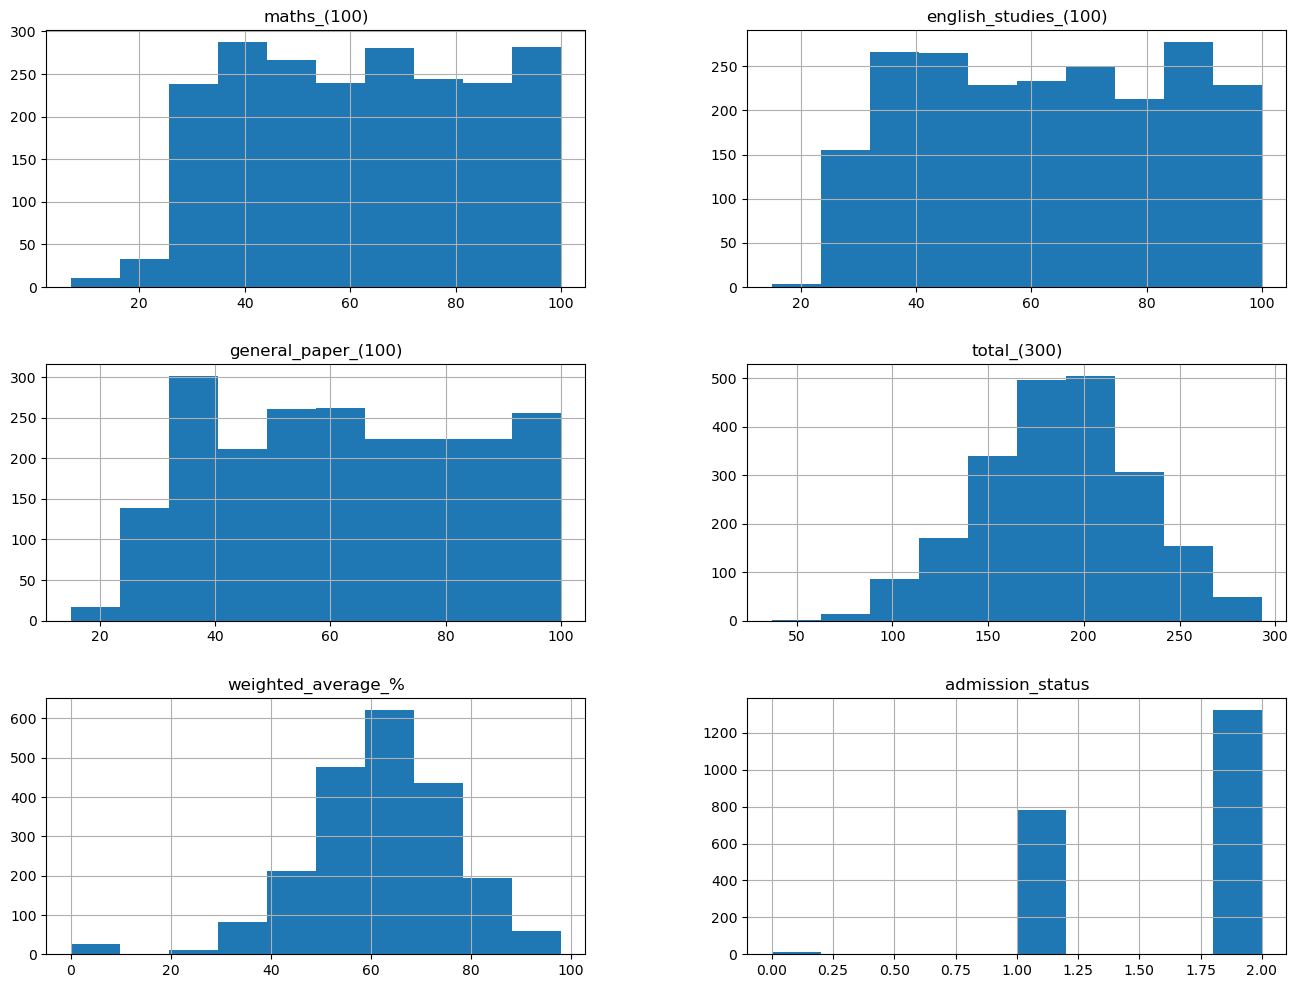

In [87]:
df0[numerical_cols].hist(figsize=(16, 12))

In [88]:
# Identifying numerical columns in the dataset
numerical_cols = df0.select_dtypes(include=['int64', 'float64']).columns

# Calculating the skewness for each numerical column
skewness = df0[numerical_cols].skew()

# Displaying the skewness values
skewness


maths_(100)             -0.002494
english_studies_(100)    0.023493
general_paper_(100)      0.043745
total_(300)             -0.090293
weighted_average_%      -0.826421
admission_status        -0.629124
dtype: float64

In [89]:
#checking for skewed columns
df0[numerical_cols].skew().sort_values(ascending= False)

general_paper_(100)      0.043745
english_studies_(100)    0.023493
maths_(100)             -0.002494
total_(300)             -0.090293
admission_status        -0.629124
weighted_average_%      -0.826421
dtype: float64

In [90]:
#this function is to check for outliers in the dataset
def outliers_func(df, multiplier=1.5):
    outliers_info = {}
    
    for col in df.select_dtypes("number"): 
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (multiplier * iqr)
        upper_bound = q3 + (multiplier * iqr)

        lower_out = (df[col] < lower_bound).sum()
        upper_out = (df[col] > upper_bound).sum()

        if lower_out > 0 or upper_out > 0:
            outliers_info[col] = {'lower_outliers': lower_out, 'upper_outliers': upper_out}

    return outliers_info

In [91]:
outlier_columns = outliers_func(df0)

In [92]:
outlier_columns

{'total_(300)': {'lower_outliers': 5, 'upper_outliers': 0},
 'weighted_average_%': {'lower_outliers': 30, 'upper_outliers': 0}}

In [93]:
#this function was used to cap the outliers in the dataset
def cap_outliers(df0, outliers_info):
    for col, (lower_bound, upper_bound) in outliers_info.items():
        # Cap the outliers
        df0[col] = df0[col].clip(lower=lower_bound, upper=upper_bound)
        
    return df0


In [94]:
cap_outliers

<function __main__.cap_outliers(df0, outliers_info)>

In [95]:
df0

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,admission_status
0,82.5,74.0,74.6,231.1,77.03,2
1,58.5,70.0,58.4,186.9,62.30,2
2,40.0,79.0,66.6,185.6,61.87,1
3,53.0,52.0,63.7,168.7,56.23,2
4,33.0,65.0,54.8,152.8,50.93,1
...,...,...,...,...,...,...
2114,72.0,92.0,27.0,191.0,64.00,2
2115,62.0,33.0,32.0,127.0,42.00,1
2116,48.0,88.0,32.0,168.0,56.00,1
2117,91.0,75.0,100.0,266.0,89.00,2


In [96]:
def get_unique_values(df0):
    for column in df0.columns:
        print(f"Unique values in '{column}':")
        print(df0[column].unique())
        print("\n")

# Call the function
get_unique_values(df0)

Unique values in 'maths_(100)':
[ 82.5   58.5   40.    53.    33.    41.    45.5   30.    35.    36.5
  32.    25.5   10.    21.5   27.    14.    21.    17.5   23.5   19.5
  18.    16.    22.5   15.    11.5   17.    22.    36.     7.     9.
  23.    58.    72.    93.    91.5   89.5   95.    84.5   63.    79.5
  77.5   74.5   70.5   62.    69.5   54.    53.5   48.    68.    51.
  51.5   48.5   20.5   49.5   26.5   24.5   27.5   44.    61.    38.5
  65.    44.5   52.    59.5   66.    73.    37.    43.    31.85  78.
  94.    70.    92.    59.    97.    86.    80.    81.    42.    89.
  79.    98.    39.    34.    84.    50.    57.   100.    88.    91.
  45.    60.    82.    83.    71.    46.    38.    64.    75.    26.
  49.    85.    55.    29.    31.    99.    69.    90.    25.    76.
  77.    96.    67.    28.    74.    87.    56.    47.  ]


Unique values in 'english_studies_(100)':
[ 74.    70.    79.    52.    65.    62.    57.    49.    55.5   63.
  48.    64.    53.    43.    45. 

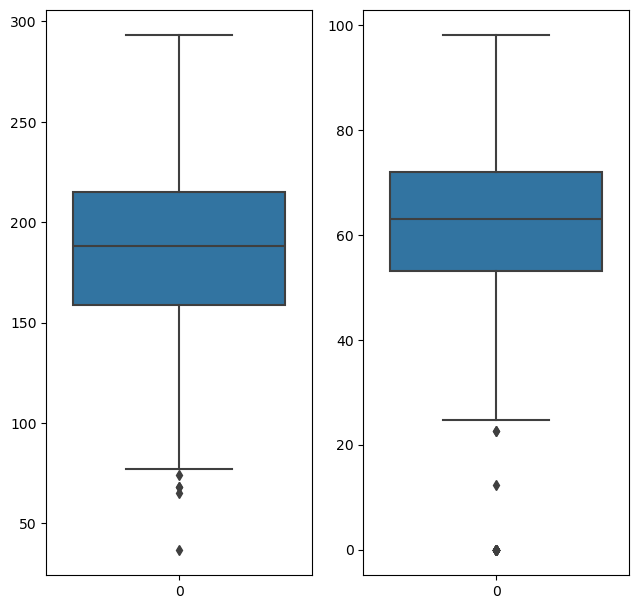

In [98]:
# Using boxplot to visualize the outlier columns

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(df0[col])
plt.tight_layout()
plt.show()

In [101]:
df0

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,admission_status
0,82.5,74.0,74.6,231.1,77.03,2
1,58.5,70.0,58.4,186.9,62.30,2
2,40.0,79.0,66.6,185.6,61.87,1
3,53.0,52.0,63.7,168.7,56.23,2
4,33.0,65.0,54.8,152.8,50.93,1
...,...,...,...,...,...,...
2114,72.0,92.0,27.0,191.0,64.00,2
2115,62.0,33.0,32.0,127.0,42.00,1
2116,48.0,88.0,32.0,168.0,56.00,1
2117,91.0,75.0,100.0,266.0,89.00,2


In [102]:
# Filter the DataFrame to show rows where Admission_Status is 0
zero_admission_data = df0[df0['admission_status'] == 0]
# Display the filtered data
print(zero_admission_data)

     maths_(100)  english_studies_(100)  general_paper_(100)  total_(300)  \
22          19.5                   35.0                 32.7         87.2   
23          19.5                   44.0                 21.9         85.4   
24          18.0                   31.5                 31.0         80.5   
26          14.0                   42.0                 23.6         79.6   
31          15.0                   30.0                 23.0         68.0   
32          11.5                   52.0                 24.0         87.5   
34          22.0                   36.0                 19.0         77.0   
38           7.0                   15.0                 15.0         37.0   
40           9.0                   50.0                 26.5         85.5   
80          27.5                   22.5                 24.0         74.0   
81          18.0                   28.0                 22.0         68.0   
548         29.0                   29.0                 33.0         91.0   

In [103]:
df0.describe()

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%,admission_status
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000
mean,62.213521,62.568754,62.257650,186.981170,61.875592,1.619160
std,22.081452,21.487370,21.818683,40.637211,14.970572,0.497236
min,7.000000,15.000000,15.000000,37.000000,0.000000,0.000000
25%,43.000000,43.470000,43.500000,159.000000,53.000000,1.000000
50%,62.000000,63.000000,62.000000,188.000000,63.000000,2.000000
75%,81.000000,81.000000,81.000000,215.000000,72.000000,2.000000
max,100.000000,100.000000,100.000000,293.000000,98.000000,2.000000


## MODELLING 

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [105]:
X = df0.drop('admission_status', axis=1)  # Input features
y = df0['admission_status']  # Output variable

In [106]:
X

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%
0,82.5,74.0,74.6,231.1,77.03
1,58.5,70.0,58.4,186.9,62.30
2,40.0,79.0,66.6,185.6,61.87
3,53.0,52.0,63.7,168.7,56.23
4,33.0,65.0,54.8,152.8,50.93
...,...,...,...,...,...
2114,72.0,92.0,27.0,191.0,64.00
2115,62.0,33.0,32.0,127.0,42.00
2116,48.0,88.0,32.0,168.0,56.00
2117,91.0,75.0,100.0,266.0,89.00


In [107]:
#Initialize the scaler
#scaler = StandardScaler()

In [108]:
# Step 2: Fit the scaler on the training data and transform the training set
#X = scaler.fit_transform(X)

In [109]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_test

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%
1824,36.0,91.0,24.0,151.0,50.0
408,43.0,81.0,88.0,212.0,71.0
744,75.0,70.0,57.0,202.0,67.0
674,96.0,43.0,37.0,176.0,59.0
1691,62.0,47.0,56.0,165.0,55.0
...,...,...,...,...,...
218,71.0,59.0,45.0,175.0,58.0
2091,49.0,92.0,61.0,202.0,67.0
2084,100.0,29.0,23.0,152.0,51.0
351,71.0,64.0,34.0,169.0,56.0


In [111]:
X_train

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%
1036,98.0,31.0,45.0,174.0,58.0
764,63.0,42.0,54.0,159.0,53.0
668,36.0,37.0,69.0,142.0,47.0
1502,76.0,86.0,59.0,221.0,74.0
926,98.0,79.0,73.0,250.0,83.0
...,...,...,...,...,...
1638,55.0,77.0,43.0,175.0,58.0
1095,78.0,98.0,58.0,234.0,78.0
1130,52.0,56.0,62.0,170.0,57.0
1294,97.0,77.0,40.0,214.0,71.0


In [112]:
y

0       2
1       2
2       1
3       2
4       1
       ..
2114    2
2115    1
2116    1
2117    2
2118    1
Name: admission_status, Length: 2119, dtype: int64

In [113]:
y_test

1824    1
408     1
744     2
674     2
1691    2
       ..
218     2
2091    1
2084    2
351     2
1816    2
Name: admission_status, Length: 424, dtype: int64

In [114]:
y_train

1036    2
764     2
668     1
1502    2
926     2
       ..
1638    2
1095    2
1130    2
1294    2
860     2
Name: admission_status, Length: 1695, dtype: int64

In [115]:
X_test

,maths_(100),english_studies_(100),general_paper_(100),total_(300),weighted_average_%
1824,36.0,91.0,24.0,151.0,50.0
408,43.0,81.0,88.0,212.0,71.0
744,75.0,70.0,57.0,202.0,67.0
674,96.0,43.0,37.0,176.0,59.0
1691,62.0,47.0,56.0,165.0,55.0
...,...,...,...,...,...
218,71.0,59.0,45.0,175.0,58.0
2091,49.0,92.0,61.0,202.0,67.0
2084,100.0,29.0,23.0,152.0,51.0
351,71.0,64.0,34.0,169.0,56.0


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [118]:
# Define models to evaluate
#fitting models into a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
}


In [119]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1695, 5) (424, 5)
(1695,) (424,)


In [120]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

def combined_model_evaluation(models, X_train, X_test, y_train, y_test):
    """
    This function evaluates models using accuracy on training and testing data,
    and also performs cross-validation for reliability of the model evaluation.
    """
    # Dictionaries to store results
    model_scores = {}
    cross_val_results = {}
    
    # Loop through each model
    for model_name, model in models.items():
        # 1. Fit the model to the training data
        model.fit(X_train, y_train)
        
        # 2. Predict on training and testing sets
        training_predictions = model.predict(X_train)
        testing_predictions = model.predict(X_test)
        
        # 3. Calculate accuracy for training and testing sets
        training_accuracy = accuracy_score(y_train, training_predictions)
        testing_accuracy = accuracy_score(y_test, testing_predictions)
        
        # 4. Store accuracy scores in the dictionary
        model_scores[model_name] = {
            'Training Accuracy': training_accuracy,
            'Testing Accuracy': testing_accuracy
        }
        
        # 5. Perform cross-validation to calculate F1 scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
        cross_val_results[model_name] = {
            'Mean F1 Score': np.mean(cv_scores),
            'F1 Standard Deviation': np.std(cv_scores)
        }
        
        # 6. Print results for each model
        print(f"{model_name} - Training Accuracy: {training_accuracy:.4f}, Testing Accuracy: {testing_accuracy:.4f}")
        print(f"{model_name} - Cross-Validated F1 Score: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    # Return both sets of results
    return model_scores, cross_val_results

#usage
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
}

# Assuming X_train and X_test, y_train, and y_test are already defined and preprocessed
model_accuracy_scores, model_cv_results = combined_model_evaluation(models, X_train, X_test, y_train, y_test)


Logistic Regression - Training Accuracy: 0.9445, Testing Accuracy: 0.9481
Logistic Regression - Cross-Validated F1 Score: 0.6263 ± 0.0089
Decision Tree - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
Decision Tree - Cross-Validated F1 Score: 0.8967 ± 0.1239
Random Forest - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
Random Forest - Cross-Validated F1 Score: 0.9775 ± 0.0450
Support Vector Machine - Training Accuracy: 0.9699, Testing Accuracy: 0.9670
Support Vector Machine - Cross-Validated F1 Score: 0.6428 ± 0.0081
K-Nearest Neighbors - Training Accuracy: 0.9894, Testing Accuracy: 0.9788
K-Nearest Neighbors - Cross-Validated F1 Score: 0.9619 ± 0.0448
Gradient Boosting - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
Gradient Boosting - Cross-Validated F1 Score: 0.9639 ± 0.0464
AdaBoost - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
AdaBoost - Cross-Validated F1 Score: 0.9223 ± 0.0455
Extra Trees - Training Accuracy: 1.0000, Testing Accuracy: 0.9882
Extra Trees 

In [121]:
model_accuracy_scores

{'Logistic Regression': {'Training Accuracy': 0.9445427728613569,
  'Testing Accuracy': 0.9481132075471698},
 'Decision Tree': {'Training Accuracy': 1.0,
  'Testing Accuracy': 0.9976415094339622},
 'Random Forest': {'Training Accuracy': 1.0,
  'Testing Accuracy': 0.9976415094339622},
 'Support Vector Machine': {'Training Accuracy': 0.9699115044247788,
  'Testing Accuracy': 0.9669811320754716},
 'K-Nearest Neighbors': {'Training Accuracy': 0.9893805309734514,
  'Testing Accuracy': 0.9787735849056604},
 'Gradient Boosting': {'Training Accuracy': 1.0,
  'Testing Accuracy': 0.9976415094339622},
 'AdaBoost': {'Training Accuracy': 1.0,
  'Testing Accuracy': 0.9976415094339622},
 'Extra Trees': {'Training Accuracy': 1.0,
  'Testing Accuracy': 0.9882075471698113}}

In [122]:
model_cv_results

{'Logistic Regression': {'Mean F1 Score': 0.6262628788511683,
  'F1 Standard Deviation': 0.008884376804823518},
 'Decision Tree': {'Mean F1 Score': 0.8967174687493413,
  'F1 Standard Deviation': 0.12394451015545817},
 'Random Forest': {'Mean F1 Score': 0.9775121735281097,
  'F1 Standard Deviation': 0.04497565294378045},
 'Support Vector Machine': {'Mean F1 Score': 0.642779047877758,
  'F1 Standard Deviation': 0.008092424504723077},
 'K-Nearest Neighbors': {'Mean F1 Score': 0.9618699522275971,
  'F1 Standard Deviation': 0.044810047273991356},
 'Gradient Boosting': {'Mean F1 Score': 0.9639132359451084,
  'F1 Standard Deviation': 0.04637793305148098},
 'AdaBoost': {'Mean F1 Score': 0.9223009047217932,
  'F1 Standard Deviation': 0.04551887121619496},
 'Extra Trees': {'Mean F1 Score': 0.974120850258546,
  'F1 Standard Deviation': 0.04330102837094984}}

In [123]:
# Selecting the best model based on testing accuracy
best_testing_accuracy = 0
best_model_name_accuracy = None

for model_name, scores in model_accuracy_scores.items():
    if scores['Testing Accuracy'] > best_testing_accuracy:
        best_testing_accuracy = scores['Testing Accuracy']
        best_model_name_accuracy = model_name

print(f"The model with the best Testing Accuracy is: {best_model_name_accuracy} with an accuracy of {best_testing_accuracy:.4f}")

# Selecting the best model based on mean F1 score
best_f1_score = 0
best_model_name_f1 = None

for model_name, cv_scores in model_cv_results.items():
    if cv_scores['Mean F1 Score'] > best_f1_score:
        best_f1_score = cv_scores['Mean F1 Score']
        best_model_name_f1 = model_name

print(f"The model with the best Mean F1 Score is: {best_model_name_f1} with an F1 score of {best_f1_score:.4f}")


The model with the best Testing Accuracy is: Decision Tree with an accuracy of 0.9976
The model with the best Mean F1 Score is: Random Forest with an F1 score of 0.9775


In [124]:
model_accuracy_scores, model_cv_results = combined_model_evaluation(models, X_train, X_test, y_train, y_test)

# Select the best model based on testing accuracy
best_accuracy_model = max(model_accuracy_scores, key=lambda x: model_accuracy_scores[x]['Testing Accuracy'])
best_accuracy_score = model_accuracy_scores[best_accuracy_model]['Testing Accuracy']

print(f"Best Model by Testing Accuracy: {best_accuracy_model} with an accuracy of {best_accuracy_score:.4f}")

Logistic Regression - Training Accuracy: 0.9445, Testing Accuracy: 0.9481
Logistic Regression - Cross-Validated F1 Score: 0.6263 ± 0.0089
Decision Tree - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
Decision Tree - Cross-Validated F1 Score: 0.9639 ± 0.0464
Random Forest - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
Random Forest - Cross-Validated F1 Score: 0.9414 ± 0.0505
Support Vector Machine - Training Accuracy: 0.9699, Testing Accuracy: 0.9670
Support Vector Machine - Cross-Validated F1 Score: 0.6428 ± 0.0081
K-Nearest Neighbors - Training Accuracy: 0.9894, Testing Accuracy: 0.9788
K-Nearest Neighbors - Cross-Validated F1 Score: 0.9619 ± 0.0448
Gradient Boosting - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
Gradient Boosting - Cross-Validated F1 Score: 0.9639 ± 0.0464
AdaBoost - Training Accuracy: 1.0000, Testing Accuracy: 0.9976
AdaBoost - Cross-Validated F1 Score: 0.9223 ± 0.0455
Extra Trees - Training Accuracy: 1.0000, Testing Accuracy: 0.9882
Extra Trees 

In [125]:
# Sort the models based on testing accuracy and get the top two
sorted_models = sorted(model_accuracy_scores.items(), key=lambda x: x[1]['Testing Accuracy'], reverse=True)

# Get the top two models
top_two_models = sorted_models[:2]

# Print the results
for model_name, scores in top_two_models:
    print(f"Model: {model_name}, Testing Accuracy: {scores['Testing Accuracy']:.4f}")


Model: Decision Tree, Testing Accuracy: 0.9976
Model: Random Forest, Testing Accuracy: 0.9976


In [126]:
from sklearn.metrics import classification_report, confusion_matrix

# # Assuming you have selected Decision Tree and Random Forest based on testing accuracy
# best_models = ['Decision Tree', 'Random Forest']

# for model_name in best_models:
#     model = models[model_name]  # Retrieve the model instance
#     model.fit(X_train, y_train)  # Fit the model on the training data
    
#     # Predict on the test set
#     predictions = model.predict(X_test)
    
#     # Generate classification report and confusion matrix
#     print(f"Classification Report for {model_name}:\n", classification_report(y_test, predictions))
#     print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, predictions))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.99      1.00      1.00       156
           2       1.00      1.00      1.00       265

    accuracy                           1.00       424
   macro avg       1.00      0.89      0.93       424
weighted avg       1.00      1.00      1.00       424

Confusion Matrix for Decision Tree:
 [[  2   1   0]
 [  0 156   0]
 [  0   0 265]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.99      1.00      1.00       156
           2       1.00      1.00      1.00       265

    accuracy                           1.00       424
   macro avg       1.00      0.89      0.93       424
weighted avg       1.00      1.00      1.00       424

Confusion Matrix for Random Forest:
 [[  2   1   0]
 [  0 156   0]
 [  

MODEL EVALUATION

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.99      1.00      1.00       156
           2       1.00      1.00      1.00       265

    accuracy                           1.00       424
   macro avg       1.00      0.89      0.93       424
weighted avg       1.00      1.00      1.00       424



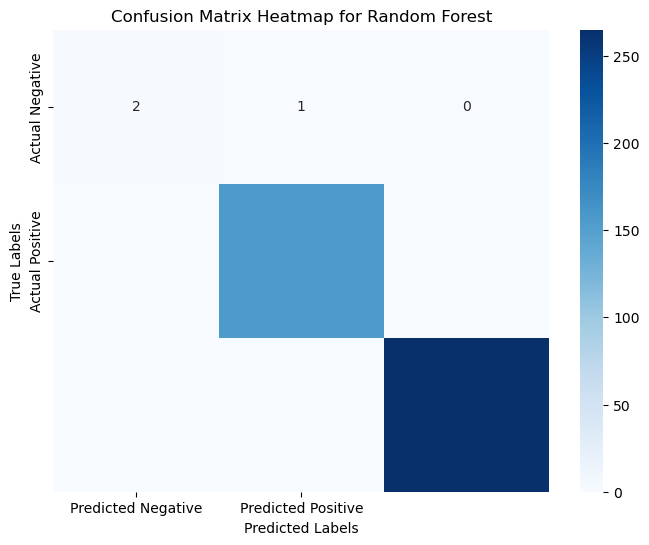

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model
rand = RandomForestClassifier()  # Instantiate the model
rand.fit(X_train, y_train)  # Fit the model to the scaled training data

# Make predictions on the test set
rand_predictions = rand.predict(X_test)  # Predict on the scaled test data

# Generate and print the classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, rand_predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, rand_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Making a Predictive System
Giving my model a data instance to make prediction on

In [128]:
import pickle

In [129]:
# #import pickle

# # Assuming 'rand' is your trained RandomForestClassifier model
filename = "Admission_model.sav"  # Define the filename with .pkl extension
# with open(filename, "wb") as file:  # Open the file in binary write mode
pickle.dump(rand, open(filename, "wb"))  # Save the model to the file


In [130]:
#from sklearn.ensemble import RandomForestClassifier  
#from joblib import dump

# Save the model using joblib
#dump(model, "Admission_model.pkl")


In [131]:
# Save the trained model to a file
#filename = "Admission_model.joblib"  # Use .joblib extension
#dump(model, filename)


In [132]:
row_index = 53

# Convert to a list and print without column names
row_values = X_test.iloc[row_index].tolist()
print(row_values)

[36.0, 30.0, 80.0, 146.0, 49.0]


In [133]:
# # Convert X_test back to a DataFrame if needed
# X_test_df = pd.DataFrame(X_test)
# row_values = X_test_df.iloc[row_index].tolist()
# print(row_values)


In [134]:
X_test.columns

Index(['maths_(100)', 'english_studies_(100)', 'general_paper_(100)',
       'total_(300)', 'weighted_average_%'],
      dtype='object')

In [135]:
# Define input data
input_data = [36.0, 30.0, 80.0, 146.0, 49.0]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = rand.predict(input_data_reshaped)

# Check the prediction and print the appropriate message
if prediction[0] == 0:
    print("Not admitted")
elif prediction[0] == 1:
    print("Advised for intensive class")
elif prediction[0] == 2:
    print("Admitted")


Advised for intensive class
